In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

%matplotlib inline 

In [34]:
yelp = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [35]:
# The .shape method tells us the number of rows and columns in the dataframe.

yelp.shape

(23486, 12)

In [36]:
yelp.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text length
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,NaN
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,NaN
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,NaN
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,NaN
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,NaN


In [37]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 12 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
text length                0 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [38]:
yelp.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,text length
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,0.0
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936,NaN
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202,NaN
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,NaN
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000,NaN
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000,NaN
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,NaN
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,NaN


In [39]:
#Finding count of null values in each column
print(yelp.isnull().sum())

#Replacing null values
yelp=yelp.fillna(" ")


Unnamed: 0                     0
Clothing ID                    0
Age                            0
Title                       3810
Review Text                  845
Rating                         0
Recommended IND                0
Positive Feedback Count        0
Division Name                 14
Department Name               14
Class Name                    14
text length                23486
dtype: int64


In [40]:
#To get an insight on the length of each review, we can create a new column in yelp called text length. 
#This column will store the number of characters in each review.
yelp['text length'] = yelp['Review Text'].apply(len)
yelp.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text length
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


In [41]:
#We can use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

#Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

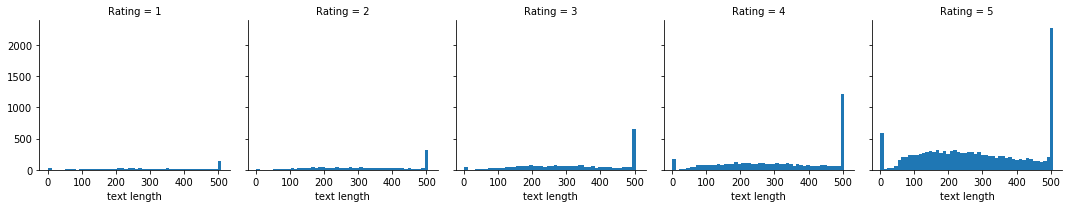

In [42]:
g = sns.FacetGrid(data=yelp, col='Rating')
g.map(plt.hist, 'text length', bins=50)
plt.show()

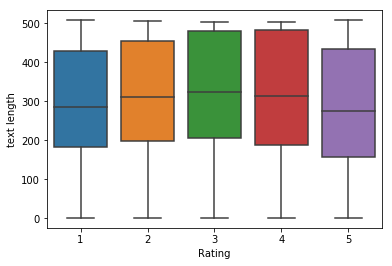

In [43]:
sns.boxplot(x='Rating', y='text length', data=yelp)

In [44]:
Rating = yelp.groupby('Rating').mean()
Rating.corr()

,Unnamed: 0,Clothing ID,Age,Recommended IND,Positive Feedback Count,text length
Unnamed: 0,1.000000,-0.529207,0.690289,-0.547077,0.512758,-0.427904
Clothing ID,-0.529207,1.000000,-0.977686,-0.303355,0.378828,0.975086
Age,0.690289,-0.977686,1.000000,0.115681,-0.194958,-0.930818
Recommended IND,-0.547077,-0.303355,0.115681,1.000000,-0.987748,-0.308847
Positive Feedback Count,0.512758,0.378828,-0.194958,-0.987748,1.000000,0.385282
text length,-0.427904,0.975086,-0.930818,-0.308847,0.385282,1.000000


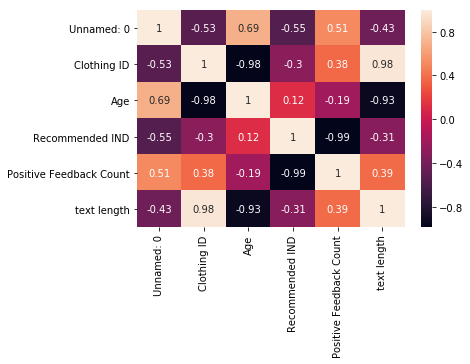

In [45]:
#To visualise these correlations, we can use Seaborn’s heatmap:
sns.heatmap(data=Rating.corr(), annot=True)

In [46]:
#Our task is to predict if a review is either bad or good, so let’s just grab reviews that are either 1 or 5 stars from the yelp dataframe. We can store the resulting reviews in a new dataframe called yelp_class.

In [47]:
yelp_class = yelp[(yelp['Rating'] == 1) | (yelp['Rating'] == 5)]
yelp_class.shape

(13973, 12)

In [48]:
yelp_class.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text length
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,496
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,166


In [49]:
#let’s create the X and y for our classification task. X will be the text column of yelp_class, and y will be the stars column.

In [50]:
X = yelp_class['Review Text']
y = yelp_class['Rating']

In [51]:
X[1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [52]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [ ]:
#Now, we can look at the size of the vocabulary stored in the vectori

In [57]:
#Now, we can look at the size of the vocabulary stored in the vectoriser 
len(bow_transformer.vocabulary_)

14687

In [ ]:
#To illustrate how the vectoriser works, let’s try a random review and get its bag-of-word counts as a vector. Here’s the twenty-fifth review as plain-text:

In [58]:
review_25 = X[24]
review_25

"I love this shirt because when i first saw it, i wasn't sure if it was a shirt or dress. since it is see-through if you wear it like a dress you will need a slip or wear it with leggings. i bought a slip, wore the tie in the back, and rocked it with white wedges. you could also wear it as a vest. be careful with the buttons. i haven't had any fall off yet, but i feel like they will. overall it's great for any occasion and it's fun to wear!"

In [59]:
#Now let’s see our review represented as a vector:
bow_25 = bow_transformer.transform([review_25])
print(bow_25)

  (0, 1503)	1
  (0, 1926)	1
  (0, 2519)	1
  (0, 2790)	1
  (0, 2919)	1
  (0, 3764)	1
  (0, 4627)	2
  (0, 5264)	1
  (0, 5371)	1
  (0, 5478)	1
  (0, 5885)	1
  (0, 6185)	1
  (0, 6384)	1
  (0, 7564)	1
  (0, 7686)	2
  (0, 7895)	1
  (0, 8692)	1
  (0, 8935)	1
  (0, 9192)	1
  (0, 10820)	1
  (0, 11056)	1
  (0, 11190)	1
  (0, 11395)	2
  (0, 11586)	1
  (0, 11776)	2
  (0, 12618)	1
  (0, 13140)	1
  (0, 13921)	1
  (0, 14108)	1
  (0, 14140)	4
  (0, 14184)	1
  (0, 14296)	1
  (0, 14466)	1
  (0, 14626)	1


In [61]:
print(bow_transformer.get_feature_names()[14140])
print(bow_transformer.get_feature_names()[11776])

wear
slip


In [ ]:
#Now that we’ve seen how the vectorisation process works, we can transform our X dataframe into a sparse matrix. 

In [64]:
X = bow_transformer.transform(X)

#We can check out the shape of our new X.
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (13973, 14687)
Amount of Non-Zero occurrences:  355059


In [65]:
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 0.1730126155281886


In [ ]:
#Training data and test data
As we have finished processing the review text in X, It’s time to split our X and y into a training and a test set using train_test_split from Scikit-learn. We will use 30% of the dataset for testing.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Training our model
Multinomial Naive Bayes is a specialised version of Naive Bayes designed more for text documents. Let’s build a Multinomial Naive Bayes model and fit it to our training set (X_train and y_train).

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[  84  162]
 [  10 3936]]


             precision    recall  f1-score   support

          1       0.89      0.34      0.49       246
          5       0.96      1.00      0.98      3946

avg / total       0.96      0.96      0.95      4192

